# Loan Case Study

### Problem Statement:

 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


**What the loan Company wants ?**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

#### Import the warnings.

In [2]:
import warnings 
warnings.filterwarnings("ignore")

#### Importing the libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Changing the display of rows and columns

In [4]:
pd.options.display.max_rows = 125
pd.options.display.max_columns = 75

# Application Data

### Read in the Data set. 

In [5]:
#read the data set of "application -information of client at the time of loan application" in inp0.
inp0= pd.read_csv("application_data.csv")


In [6]:
# Checking the shape of the dataframe
inp0.shape

(307511, 122)

#### Checking the null value percentage

In [7]:
((inp0.isnull().sum() *100)/inp0.shape[0]).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Data Cleaning (droppping the cols with more than 35% of the missing values)

##### Below are the columns to be removed :
    COMMONAREA_MEDI                 69.872297
    COMMONAREA_AVG                  69.872297
    COMMONAREA_MODE                 69.872297
    NONLIVINGAPARTMENTS_MODE        69.432963
    NONLIVINGAPARTMENTS_AVG         69.432963
    NONLIVINGAPARTMENTS_MEDI        69.432963
    FONDKAPREMONT_MODE              68.386172
    LIVINGAPARTMENTS_MODE           68.354953
    LIVINGAPARTMENTS_AVG            68.354953
    LIVINGAPARTMENTS_MEDI           68.354953
    FLOORSMIN_AVG                   67.848630
    FLOORSMIN_MODE                  67.848630
    FLOORSMIN_MEDI                  67.848630
    YEARS_BUILD_MEDI                66.497784
    YEARS_BUILD_MODE                66.497784
    YEARS_BUILD_AVG                 66.497784
    OWN_CAR_AGE                     65.990810
    LANDAREA_MEDI                   59.376738
    LANDAREA_MODE                   59.376738
    LANDAREA_AVG                    59.376738
    BASEMENTAREA_MEDI               58.515956
    BASEMENTAREA_AVG                58.515956
    BASEMENTAREA_MODE               58.515956
    EXT_SOURCE_1                    56.381073
    NONLIVINGAREA_MODE              55.179164
    NONLIVINGAREA_AVG               55.179164
    NONLIVINGAREA_MEDI              55.179164
    ELEVATORS_MEDI                  53.295980
    ELEVATORS_AVG                   53.295980
    ELEVATORS_MODE                  53.295980
    WALLSMATERIAL_MODE              50.840783
    APARTMENTS_MEDI                 50.749729
    APARTMENTS_AVG                  50.749729
    APARTMENTS_MODE                 50.749729
    ENTRANCES_MEDI                  50.348768
    ENTRANCES_AVG                   50.348768
    ENTRANCES_MODE                  50.348768
    LIVINGAREA_AVG                  50.193326
    LIVINGAREA_MODE                 50.193326
    LIVINGAREA_MEDI                 50.193326
    HOUSETYPE_MODE                  50.176091
    FLOORSMAX_MODE                  49.760822
    FLOORSMAX_MEDI                  49.760822
    FLOORSMAX_AVG                   49.760822
    YEARS_BEGINEXPLUATATION_MODE    48.781019
    YEARS_BEGINEXPLUATATION_MEDI    48.781019
    YEARS_BEGINEXPLUATATION_AVG     48.781019
    TOTALAREA_MODE                  48.268517
    EMERGENCYSTATE_MODE             47.398304

In [8]:
#Preparing list of the columns to be dropped
percent_miss_35 = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG',
                   'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG',
                   'LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
                   'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG',
                   'BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE',
                   'NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE',
                   'WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG',
                   'ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE',
                   'FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI',
                   'YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [9]:
#Drop the columns

inp0.drop(percent_miss_35,axis=1,inplace=True)

In [10]:
#check the percentage null values again to verify

((inp0.isnull().sum() *100)/inp0.shape[0]).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### Imputing the missing values

#### There are few missing values in cols :
    OCCUPATION_TYPE                31.345545
    EXT_SOURCE_3                   19.825307
    AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
    AMT_REQ_CREDIT_BUREAU_QRT      13.501631
    AMT_REQ_CREDIT_BUREAU_MON      13.501631
    AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
    AMT_REQ_CREDIT_BUREAU_DAY      13.501631
    AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
    NAME_TYPE_SUITE                 0.420148
    OBS_30_CNT_SOCIAL_CIRCLE        0.332021
    DEF_30_CNT_SOCIAL_CIRCLE        0.332021
    OBS_60_CNT_SOCIAL_CIRCLE        0.332021
    DEF_60_CNT_SOCIAL_CIRCLE        0.332021
    EXT_SOURCE_2                    0.214626
    AMT_GOODS_PRICE                 0.090403
    AMT_ANNUITY                     0.003902
    CNT_FAM_MEMBERS                 0.000650
    DAYS_LAST_PHONE_CHANGE          0.000325

In [11]:
# Check the column "OCCUPATION_TYPE"

inp0.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)

NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
# Since 31.34 % is missing value in the OCCUPATION_TYPE 
#Also this is a categorical variable ( Nominal Categorical ) so taking the mode and filling the value can mislead the result
#So it is good to put them in a new category "Missing"

inp0['OCCUPATION_TYPE'].fillna(value="Missing",inplace=True)

In [13]:
#Re check the column 
inp0.OCCUPATION_TYPE.isnull().sum()

0

In [14]:
# Since 19.82 % is missing value in the EXT_SOURCE_3 
#Also this is a numerical variable so taking the median and filling the values as mean will be affected by the outliers

inp0.EXT_SOURCE_3.fillna(value = inp0.EXT_SOURCE_3.median(),inplace= True)



In [15]:
#Recheck if the nulls are filled or not
inp0.EXT_SOURCE_3.isnull().sum()

0

In [16]:
#Fixing below columns
# AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
# AMT_REQ_CREDIT_BUREAU_QRT      13.501631
# AMT_REQ_CREDIT_BUREAU_MON      13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
# AMT_REQ_CREDIT_BUREAU_DAY      13.501631
# AMT_REQ_CREDIT_BUREAU_HOUR     13.501631

In [17]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(dropna=False,normalize=True)


0.0     0.233491
1.0     0.206188
2.0     0.163220
NaN     0.135016
3.0     0.109355
4.0     0.067360
5.0     0.039192
6.0     0.022656
7.0     0.012582
8.0     0.006917
9.0     0.003564
11.0    0.000101
12.0    0.000098
10.0    0.000072
13.0    0.000062
14.0    0.000033
17.0    0.000023
15.0    0.000020
19.0    0.000013
18.0    0.000013
16.0    0.000010
25.0    0.000003
23.0    0.000003
22.0    0.000003
21.0    0.000003
20.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [18]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(dropna=False,normalize=True)


0.0      0.700518
NaN      0.135016
1.0      0.110116
2.0      0.046867
3.0      0.005584
4.0      0.001548
5.0      0.000208
6.0      0.000091
8.0      0.000023
7.0      0.000023
261.0    0.000003
19.0     0.000003
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [19]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.value_counts(dropna=False,normalize=True)


0.0     0.722683
NaN     0.135016
1.0     0.107791
2.0     0.017515
3.0     0.006475
4.0     0.003499
5.0     0.001958
6.0     0.001115
7.0     0.000969
9.0     0.000670
8.0     0.000602
10.0    0.000429
11.0    0.000387
12.0    0.000250
13.0    0.000234
14.0    0.000130
15.0    0.000114
16.0    0.000075
17.0    0.000046
18.0    0.000020
19.0    0.000010
24.0    0.000003
23.0    0.000003
27.0    0.000003
22.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [20]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(dropna=False,normalize=True)


0.0    0.837225
NaN    0.135016
1.0    0.026692
2.0    0.000647
3.0    0.000189
4.0    0.000111
6.0    0.000065
5.0    0.000033
8.0    0.000016
7.0    0.000007
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [21]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(dropna=False,normalize=True)


0.0    0.860142
NaN    0.135016
1.0    0.004201
2.0    0.000345
3.0    0.000146
4.0    0.000085
5.0    0.000029
6.0    0.000026
9.0    0.000007
8.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [22]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(dropna=False,normalize=True)

0.0    0.859696
NaN    0.135016
1.0    0.005073
2.0    0.000182
3.0    0.000029
4.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### All the above columns are not adding meaning to the analysis as most of the data is 0 enquires or NaN


In [23]:
#Preparing list to be droppped

drop_AMT_REQ_CREDIT_BUREAU = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON',
                              'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

In [24]:
#Droppping the above columns
inp0.drop(drop_AMT_REQ_CREDIT_BUREAU,axis=1,inplace=True)

In [25]:
inp0.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [26]:
#NAME_TYPE_SUITE has 0.42 missing percentage so filling it with mode

inp0.NAME_TYPE_SUITE.fillna(value = inp0.NAME_TYPE_SUITE.mode()[0],inplace= True)

In [27]:
#Check for the null value
inp0[inp0.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21


In [28]:
# Dropping these columns because more than 60-65 % of the value is either NaN or 0
#     OBS_30_CNT_SOCIAL_CIRCLE        0.332021
#     DEF_30_CNT_SOCIAL_CIRCLE        0.332021
#     OBS_60_CNT_SOCIAL_CIRCLE        0.332021
#     DEF_60_CNT_SOCIAL_CIRCLE        0.332021
drop_SOCIAL_CIRCLE=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
inp0.drop(drop_SOCIAL_CIRCLE,axis=1,inplace=True)

In [29]:
((inp0.isnull().sum()*100)/inp0.shape[0]).sort_values(ascending = True)

SK_ID_CURR                     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_3                   0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000


In [30]:
#Keeping only the flag document3 and removing rest.In value count it is evident that documents were not provided

#inp0.FLAG_DOCUMENT_2.value_counts(dropna=False,normalize=True)
inp0.FLAG_DOCUMENT_3.value_counts(dropna=False,normalize=True) 
#inp0.FLAG_DOCUMENT_4.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_5.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_6.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_7.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_8.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_9.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_10.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_11.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_12.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_13.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_14.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_15.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_16.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_17.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_18.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_19.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_20.value_counts(dropna=False)
#inp0.FLAG_DOCUMENT_21.value_counts(dropna=False)


1    0.710023
0    0.289977
Name: FLAG_DOCUMENT_3, dtype: float64

In [31]:
#Prepare list to drop and then drop them
drop_FLAG_DOCUMENT = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                      'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
                      'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                      'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


inp0.drop(drop_FLAG_DOCUMENT,axis=1, inplace=True)

In [32]:
inp0.shape

(307511, 44)

In [33]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,307511.000000,307510.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.515695,-962.858788,0.710023
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.174736,826.808487,0.453752
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.417100,-1570.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,-757.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.636376,-274.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,0.000000,1.000000


In [34]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [35]:
#Analysing CODE_GENDER 
print(inp0.CODE_GENDER.value_counts(normalize=True))
print("*****************************")
#In this category F has higher frequency (mode)
print("Replacing XNA with 'F' ")
inp0.loc[inp0.CODE_GENDER=="XNA","CODE_GENDER"] = 'F'

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
*****************************
Replacing XNA with 'F' 


In [36]:
# Replacing the XNA values to Missing in ORGANIZATION_TYPE as 18% is XNA

inp0.loc[inp0.ORGANIZATION_TYPE=="XNA","ORGANIZATION_TYPE"] = "Missing"

In [37]:
print(inp0.ORGANIZATION_TYPE.value_counts(dropna = False))

Business Entity Type 3    67992
Missing                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### In the columns below there is ' - ' before the number 
    DAYS_BIRTH
    DAYS_EMPLOYED
    DAYS_REGISTRATION
    DAYS_ID_PUBLISH
    
Remove and set it back


In [38]:
inp0.DAYS_BIRTH = inp0.DAYS_BIRTH.apply(lambda x:abs(x))
inp0.DAYS_EMPLOYED = inp0.DAYS_EMPLOYED.apply(lambda x:abs(x))
inp0.DAYS_REGISTRATION = inp0.DAYS_REGISTRATION.apply(lambda x:abs(x))
inp0.DAYS_ID_PUBLISH = inp0.DAYS_ID_PUBLISH.apply(lambda x:abs(x))


In [39]:
#Dropping few columns as these are mostly the columns where percentage value of 0 is high
#FLAG_WORK_PHONE, DAYS_LAST_PHONE_CHANGE, REG_REGION_NOT_LIVE_REGION, REG_CITY_NOT_LIVE_CITY, 
#FLAG_EMAIL
# dropping region rating of the client as there is another rating field wrt city REGION_RATING_CLIENT ,REG_CITY_NOT_WORK_CITY,
#LIVE_CITY_NOT_WORK_CITY,
#
inp0.drop(['FLAG_WORK_PHONE','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','FLAG_EMAIL'],axis=1,inplace=True)

In [40]:
#Dropping few more columns where again the %districution is more for 0
inp0.drop(['REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)

#### Outliers Check

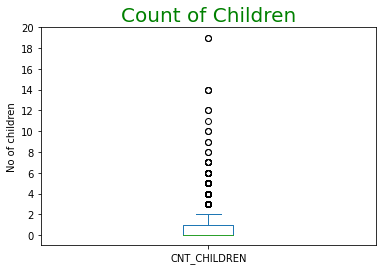

In [44]:
#CNT_CHILDREN
inp0.CNT_CHILDREN.plot.box()
plt.title("Count of Children",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
ticks = np.arange(0, 22, 2)
labels = [i for i in ticks]
plt.yticks(ticks,labels)
plt.ylabel("No of children")
plt.show()

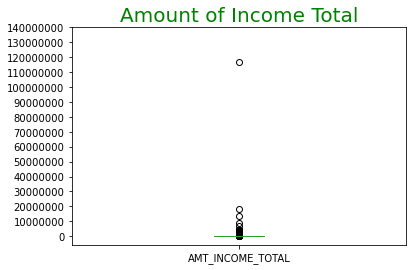

In [53]:
#AMT_INCOME_TOTAL
inp0.AMT_INCOME_TOTAL.plot.box()
plt.title("Amount of Income Total",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
ticks = np.arange(0, 150000000, 10000000)
labels = [i for i in ticks]
plt.yticks(ticks,labels)

plt.show()


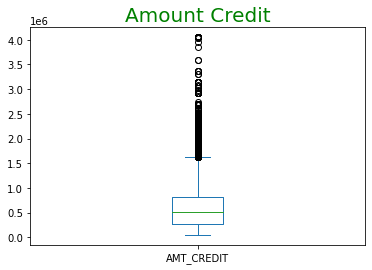

In [42]:
#AMT_CREDIT
inp0.AMT_CREDIT.plot.box()
plt.title("Amount Credit",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})

plt.show()

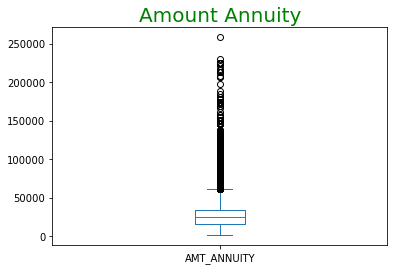

In [43]:
#AMT_ANNUITY
inp0.AMT_ANNUITY.plot.box()
plt.title("Amount Annuity",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

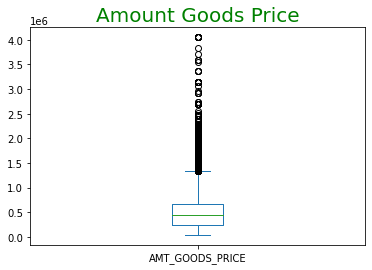

In [44]:
#AMT_GOODS_PRICE
inp0.AMT_GOODS_PRICE.plot.box()
plt.title("Amount Goods Price",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

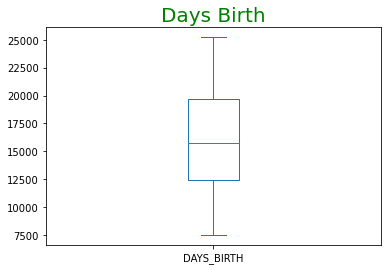

In [45]:
#DAYS_BIRTH
inp0.DAYS_BIRTH.plot.box()
plt.title("Days Birth",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

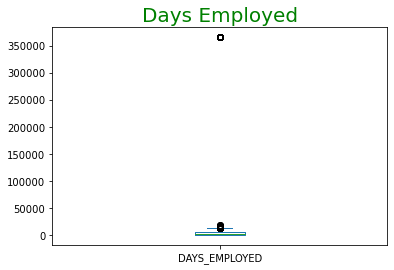

In [46]:
#DAYS_EMPLOYED
inp0.DAYS_EMPLOYED.plot.box()
plt.title("Days Employed",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

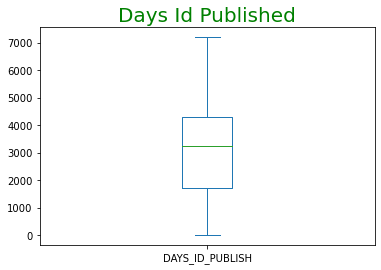

In [47]:
#DAYS_ID_PUBLISH
inp0.DAYS_ID_PUBLISH.plot.box()
plt.title("Days Id Published",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

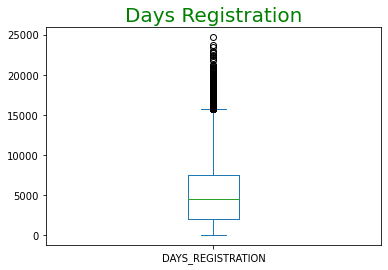

In [48]:
#DAYS_REGISTRATION
inp0.DAYS_REGISTRATION.plot.box()
plt.title("Days Registration",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

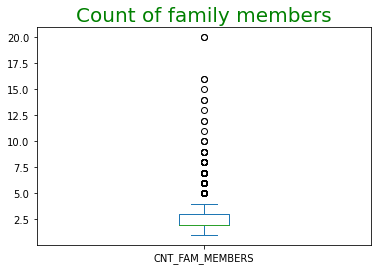

In [49]:
#CNT_FAM_MEMBERS
inp0.CNT_FAM_MEMBERS.plot.box()
plt.title("Count of family members",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

# Observations : 

    Outliers are present in 
        DAYS_EMPLOYED
        CNT_CHILDREN
        AMT_INCOME_TOTAL
        DAYS_BIRTH
        CNT_FAM_MEMBERS
        AMT_GOODS_PRICE
        AMT_CREDIT
        AMT_ANNUITY

    No outliers are there in
        DAYS_BIRTH
        DAYS_ID_PUBLISH

# Univariate Analysis

#### 1 ) CODE_GENDER

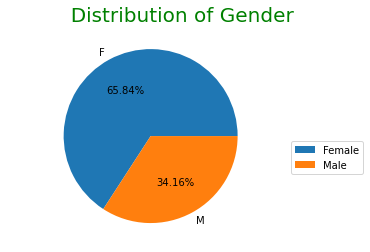

In [50]:
inp0.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("          Distribution of Gender", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['Female','Male'],bbox_to_anchor=(1.5, .5))
plt.show()


### OBSERVATION : Percentage of Female applicants are more as compared to male 

#### 2)NAME_CONTRACT_TYPE

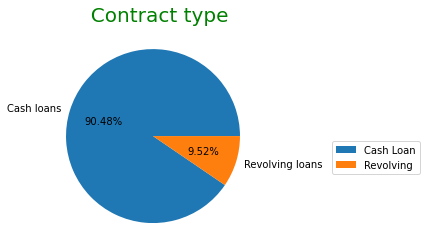

In [52]:
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("  Contract type", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['Cash Loan','Revolving'],bbox_to_anchor=(1.75, .5))
plt.show()

### OBSERVATION : Majority are interested in Cash loan and only 9.52% are interested in Revolving loan 


#### 3) FLAG_OWN_CAR

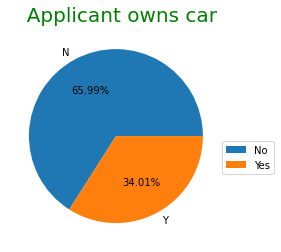

In [53]:
inp0.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("  Applicant owns car", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['No','Yes'],bbox_to_anchor=(1.25, .5))
plt.show()

### OBSERVATION : Only 34% owns car.Majority applicants does not own car

#### 4) FLAG_OWN_REALTY

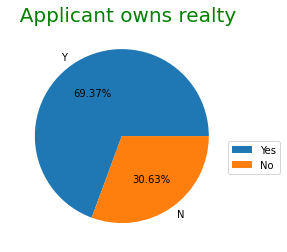

In [54]:
inp0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("  Applicant owns realty", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['Yes','No'],bbox_to_anchor=(1.25, .5))
plt.show()

### Applicants who own realty are almost 70%

#### 5) NAME_TYPE_SUITE

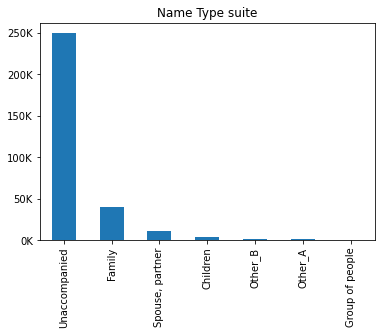

In [54]:
inp0.NAME_TYPE_SUITE.value_counts().plot.bar()
ticks = np.arange(0, 300000, 50000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.xticks(rotation=90)
plt.title("Name Type suite")
plt.show()

### Observation : Applicants are mostly  Unaccompained and there are very less applicants taking loans coming in a group.

#### 6)NAME_INCOME_TYPE

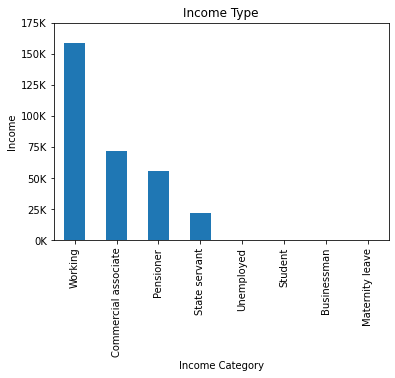

In [57]:
inp0.NAME_INCOME_TYPE.value_counts().plot.bar()
ticks = np.arange(0, 200000, 25000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.xticks(rotation=90)
plt.title("Income Type")
plt.xlabel("Income Category")
plt.ylabel("Income")
plt.show()

### Observation : The applicants applying for loans are mostly - Working professional, Commercial Associate and Pensioner

#### 7)NAME_EDUCATION_TYPE

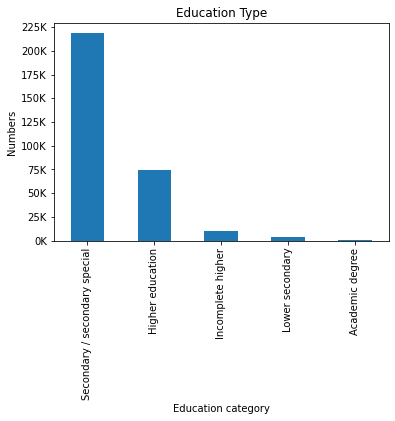

In [60]:
inp0.NAME_EDUCATION_TYPE.value_counts().plot.bar()
ticks = np.arange(0, 250000, 25000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.xticks(rotation=90)
plt.title("Education Type")
plt.xlabel("Education category")
plt.ylabel("Numbers")
plt.show()

In [59]:
inp0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

### Observation :  Applicants applying for loan are mostly having Secondary special education type.

#### 8) NAME_FAMILY_STATUS

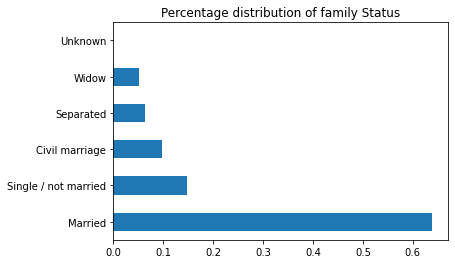

In [67]:
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title("Percentage distribution of family Status")
plt.show()

#### Observation : More than 60% applicants applying for loan are married. 

#### 9) NAME_HOUSING_TYPE

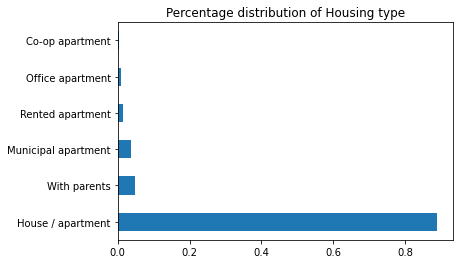

In [68]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title("Percentage distribution of Housing type")
plt.show()

### Observation : More than 80% applicants applying for loan have House/Apartment.

#### 10) ORGANIZATION_TYPE

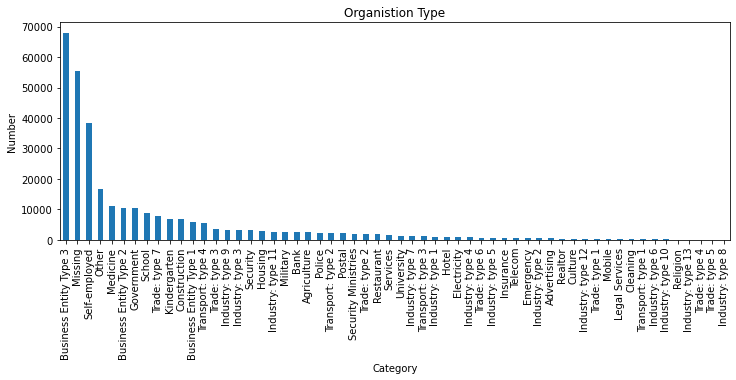

In [66]:
plt.figure(figsize=[12,4])
inp0.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.title("Organistion Type")
plt.xlabel("Category")
plt.ylabel("Number")
plt.show()

### Observation : Mostly applicants belong to "Business Entity Type 3" category or they have not provided their business type

#### 11)OCCUPATION_TYPE

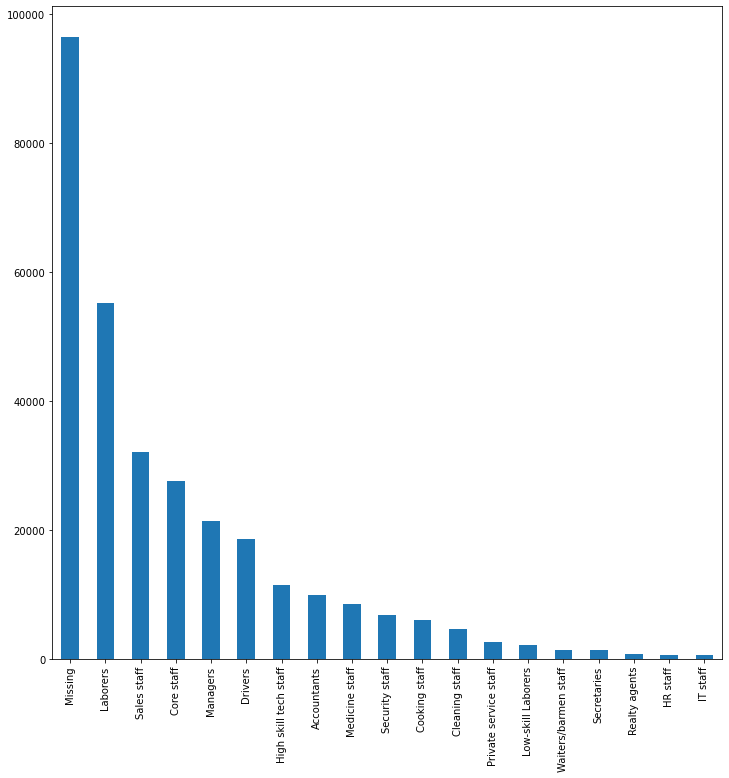

In [70]:
plt.figure(figsize=[12,12])
inp0.OCCUPATION_TYPE.value_counts().plot.bar()
plt.show()

### Observation : Applicants are not providing their occupation type.Many values are missing. Many applicants are "Labourers".

# Bivariate and Multivariate Analysis

In [73]:
#DAYS_BIRTH vs TARGET

inp0["age_group"]=pd.cut(inp0.DAYS_BIRTH//365,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [74]:
inp0.age_group.value_counts(normalize=True)

30-40    0.270290
40-50    0.241946
50-60    0.220542
<30      0.171721
60+      0.095502
Name: age_group, dtype: float64

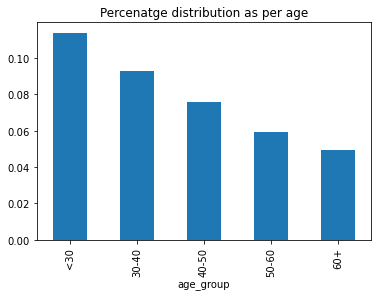

In [75]:
inp0.groupby("age_group")["TARGET"].mean().plot.bar()
plt.title("Percenatge distribution as per age")
plt.show()

### Observation : Age 60+ has less chances of defaulting

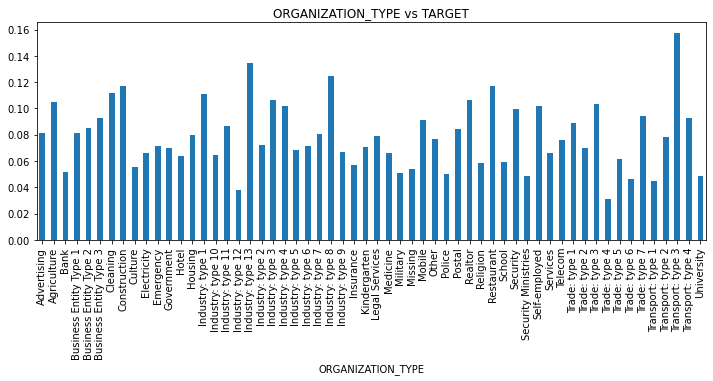

In [78]:
#ORGANIZATION_TYPE vs TARGET
plt.figure(figsize=[12,4])
inp0.groupby("ORGANIZATION_TYPE")["TARGET"].mean().plot.bar()
plt.title("ORGANIZATION_TYPE vs TARGET")
plt.show()

### Observation : Applicants with Organization type Transport type 3 are defaulting the most

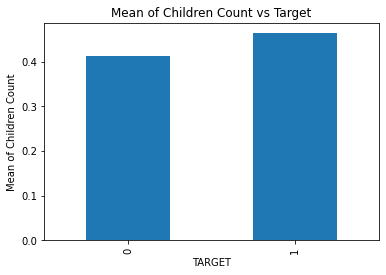

In [80]:
inp0.groupby("TARGET")["CNT_CHILDREN"].mean().plot.bar()
plt.title("Mean of Children Count vs Target")
plt.ylabel("Mean of Children Count")
plt.show()

### Observation : With increase in count of children default rate goes up

In [62]:
# 'AMT_INCOME_TOTAL' , 'DAYS_BIRTH' , 'DAYS_EMPLOYED', 
#Making corelation coefficient chart

inp0[["AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]].corr()


,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,-0.027261,-0.063835
DAYS_BIRTH,-0.027261,1.000000,0.623941
DAYS_EMPLOYED,-0.063835,0.623941,1.000000


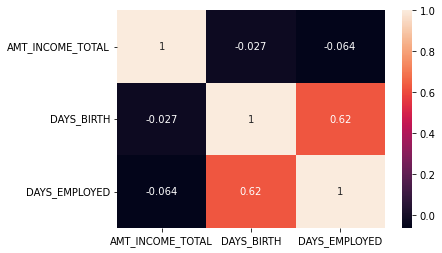

In [63]:
sns.heatmap(inp0[["AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]].corr(), annot=True)
plt.show()

### Observation : Variables are not showing a very strong relationship. But DAYS_EMPLOYED and DAYS_BIRTH have more than avg relation. With age the employment also increases which is the real scenario

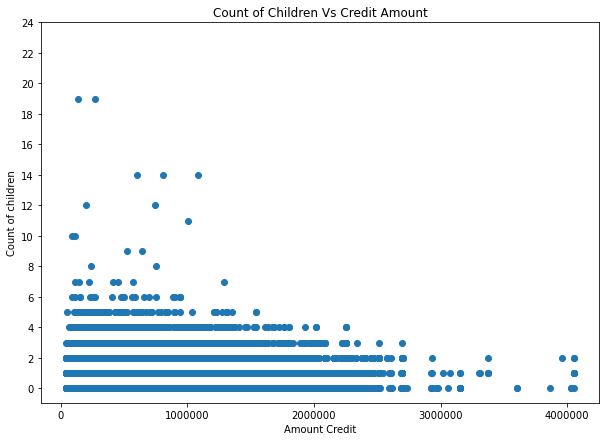

In [81]:
# AMT_CREDIT vs CNT_CHILDREN
plt.figure(figsize=[10,7])
plt.scatter(inp0.AMT_CREDIT,inp0.CNT_CHILDREN)
plt.xlabel("Amount Credit")
plt.ylabel("Count of children")
ticks = np.arange(0, 25,2)
labels = [i for i in ticks]
plt.yticks(ticks,labels)


ticks = np.arange(0, 5000000,1000000)
labels = [i for i in ticks]
plt.xticks(ticks,labels)
plt.title("Count of Children Vs Credit Amount")

plt.show()

### Observation : Majority of the applicants are having children count below 6 and amount credit is not more than 30lacs but there are few exceptions

In [65]:
# TARGET VS AMT_INCOME_TOTAL
print("Mean")
print("---------")
print(inp0.groupby("TARGET")["AMT_INCOME_TOTAL"].mean())
print("*************************************************")
print("Median")
print("---------")
print(inp0.groupby("TARGET")["AMT_INCOME_TOTAL"].median())

Mean
---------
TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64
*************************************************
Median
---------
TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64


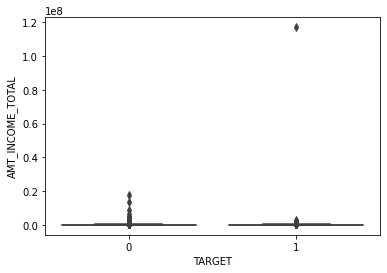

In [66]:
sns.boxplot(data=inp0,x="TARGET",y="AMT_INCOME_TOTAL")

plt.show()

In [67]:
def p75(x):
    return np.quantile(x, 0.75)

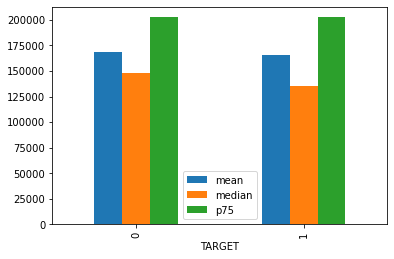

In [68]:
inp0.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(['mean','median',p75]).plot.bar()
plt.show()

### Observation : Applicants having salary below 1.35lacs are more likely to be defaulters

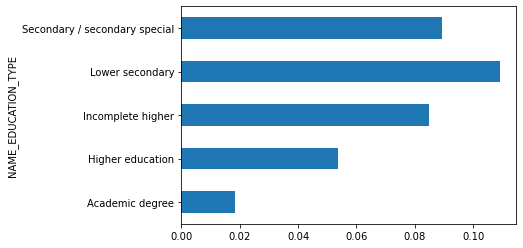

In [69]:
#NAME_EDUCATION_TYPE vs TARGET

inp0.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.barh()
plt.show()

### Observation :  Application with Higher education and Academic degree are less likely to be defaulters.

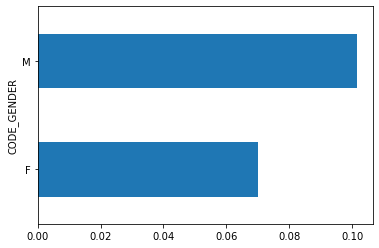

In [70]:
#CODE_GENDER vs TARGET

inp0.groupby("CODE_GENDER")["TARGET"].mean().plot.barh()
plt.show()

In [87]:
inp0[inp0.NAME_FAMILY_STATUS == "Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,age_group
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,12396,1161,3265.0,4489,1,1,1,1,Managers,NaN,2,THURSDAY,15,Insurance,0.700618,0.535276,0,30-40
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,12844,232,1597.0,1571,1,1,1,0,Accountants,NaN,2,FRIDAY,14,Business Entity Type 2,0.645168,0.670652,0,30-40


In [96]:
inp0.loc[inp0.NAME_FAMILY_STATUS=="Unknown","NAME_FAMILY_STATUS"] = "Married"

In [97]:
inp0.NAME_FAMILY_STATUS.value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### Observation Females are less likely to be defaulters as compared to Males

In [98]:
res = pd.pivot_table(data=inp0,index="NAME_FAMILY_STATUS",columns="OCCUPATION_TYPE",values="TARGET")

res

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Missing,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_FAMILY_STATUS,,,,,,,,,,,,,,,,,,,
Civil marriage,0.039370,0.102612,0.120397,0.077809,0.146597,0.136364,0.079108,0.095238,0.129185,0.161094,0.076744,0.097387,0.080831,0.076159,0.025316,0.103650,0.086957,0.124665,0.081633
Married,0.046736,0.096250,0.097944,0.058064,0.101009,0.046832,0.057012,0.069536,0.096642,0.165426,0.057751,0.063981,0.061559,0.059642,0.081498,0.093878,0.078292,0.096394,0.122511
Separated,0.053352,0.078652,0.084135,0.057576,0.145655,0.065217,0.061252,0.000000,0.109462,0.164835,0.068750,0.060514,0.068443,0.105263,0.115385,0.097902,0.000000,0.118834,0.070000
Single / not married,0.058704,0.122066,0.144550,0.080491,0.147986,0.066667,0.072008,0.060000,0.132301,0.204545,0.077488,0.073257,0.077041,0.061896,0.093960,0.101770,0.059633,0.140472,0.131653
Widow,0.044521,0.067265,0.059859,0.038880,0.153153,0.200000,0.048327,0.000000,0.069250,0.041667,0.043290,0.038554,0.056668,0.034483,0.000000,0.077991,0.038462,0.086486,0.047619


In [100]:
inp0.NAME_FAMILY_STATUS.value_counts(dropna=False)

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

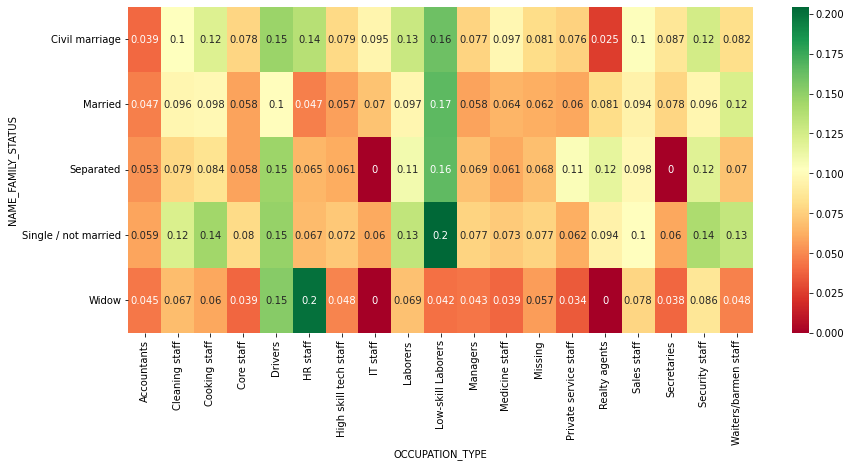

In [101]:
plt.figure(figsize=[14,6])
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.show()

### Observation : Applicants doing Civil Marriage or Single Married have higher rates of defaults.

###  TARGET DATA balance check

In [73]:
inp0.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

##### TARGET is imbalanced as non defaulters are dominating over defaulters. 

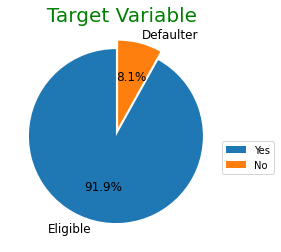

In [74]:
plt.pie(inp0["TARGET"].value_counts(), autopct='%1.1f%%', labels=("Eligible","Defaulter"),explode = (0, 0.1),
        textprops={'fontsize': 12, 'fontweight' : 10, 'color' : 'Black'}, startangle=90)

plt.title("  Target Variable", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['Yes','No'],bbox_to_anchor=(1.25, .5))
plt.show()

# Previous data

In [103]:
inp1= pd.read_csv("previous_application.csv")


In [104]:
previousApp = inp1[["SK_ID_PREV","SK_ID_CURR","AMT_APPLICATION","AMT_CREDIT","NAME_CASH_LOAN_PURPOSE","CODE_REJECT_REASON","NAME_CONTRACT_STATUS"]]

In [77]:
previousApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   AMT_APPLICATION         1670214 non-null  float64
 3   AMT_CREDIT              1670213 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 5   CODE_REJECT_REASON      1670214 non-null  object 
 6   NAME_CONTRACT_STATUS    1670214 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 89.2+ MB


#### Checking nulls in the previousApp data frame


In [78]:
previousApp.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
AMT_APPLICATION           0
AMT_CREDIT                1
NAME_CASH_LOAN_PURPOSE    0
CODE_REJECT_REASON        0
NAME_CONTRACT_STATUS      0
dtype: int64

#### Treating the missing value:

In [105]:
#Filling with the median value
previousApp.AMT_CREDIT.fillna(value=previousApp.AMT_CREDIT.median(),inplace=True)

#### Outlier check

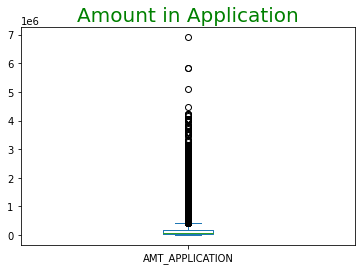

In [106]:
previousApp.AMT_APPLICATION.plot.box()
plt.title("Amount in Application",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

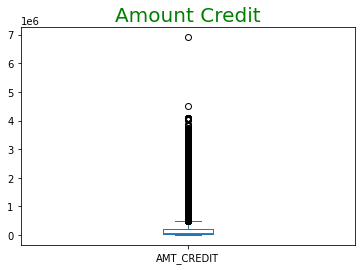

In [107]:
previousApp.AMT_CREDIT.plot.box()
plt.title("Amount Credit",fontdict={"fontsize":20,"fontweight":5,"color":"Green"})
plt.show()

### Observation : There are ouliers in both Amount credit and Amount Application

## Univariate Analysis

##### 1) CODE_REJECT_REASON

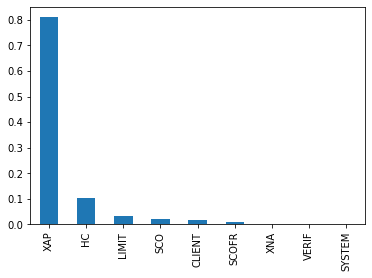

In [82]:
previousApp.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar()
plt.show()

### Observation : Mostly the reason for rejection was "XAP"

#### 2) NAME_CASH_LOAN_PURPOSE

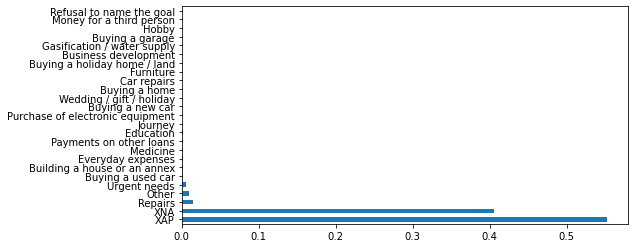

In [108]:
plt.figure(figsize=[8,4])
previousApp.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
plt.show()

### Observation : Half of the application's purpose of loan is either XAP/XNA(Missing)

## Bivariate and Multivariate Analysis


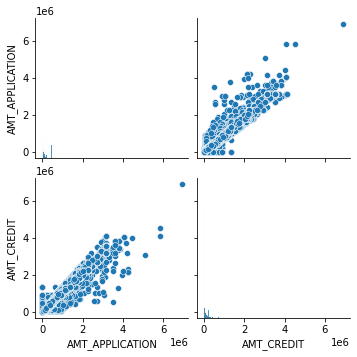

In [84]:
sns.pairplot(previousApp[['AMT_APPLICATION', 'AMT_CREDIT']])
plt.show()

### Observation : Shows a positive relationship

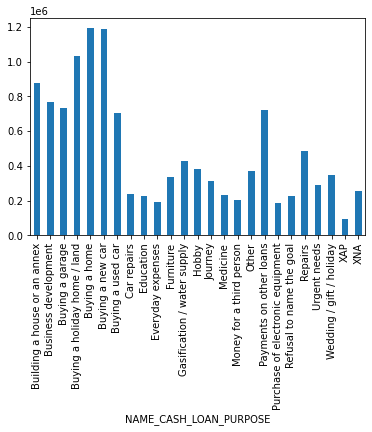

In [85]:
previousApp.groupby("NAME_CASH_LOAN_PURPOSE")["AMT_APPLICATION"].mean().plot.bar()
plt.show()

### Observation : Loans are mostly taken to buy a home or car

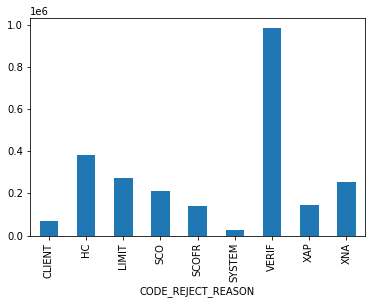

In [86]:
previousApp.groupby("CODE_REJECT_REASON")["AMT_APPLICATION"].mean().plot.bar()
plt.show()

### Observation : A very high volume of applicants are rejected due to applicant's verification.

# Merge the 2 datasets

In [87]:
inp0.shape

(307511, 34)

In [88]:
previousApp.shape

(1670214, 7)

In [110]:
newData = inp0.merge(previousApp,how='inner',on = 'SK_ID_CURR')

In [90]:
newData.shape

(1413701, 40)

## Bivariate and Multivariate Analysis

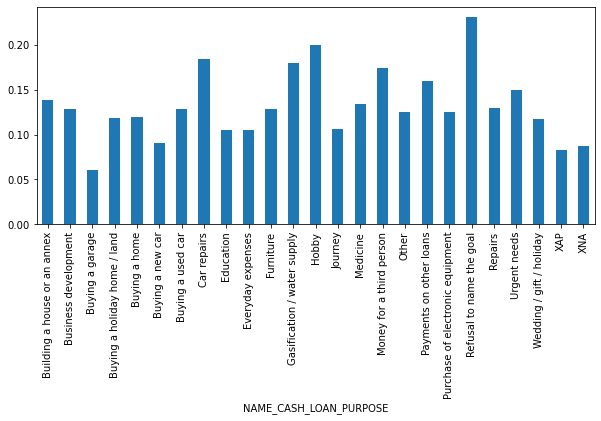

In [112]:
#NAME_CASH_LOAN_PURPOSE vs TARGET
plt.figure(figsize=[10,4])
newData.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().plot.bar()
plt.show()


### Observation : Applicants refusing to share the reason of loan are mostly defaulters

In [94]:
# NAME_CONTRACT_STATUS and NAME_CASH_LOAN_PURPOSE vs TARGET
result = pd.pivot_table(data=newData,index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='TARGET')

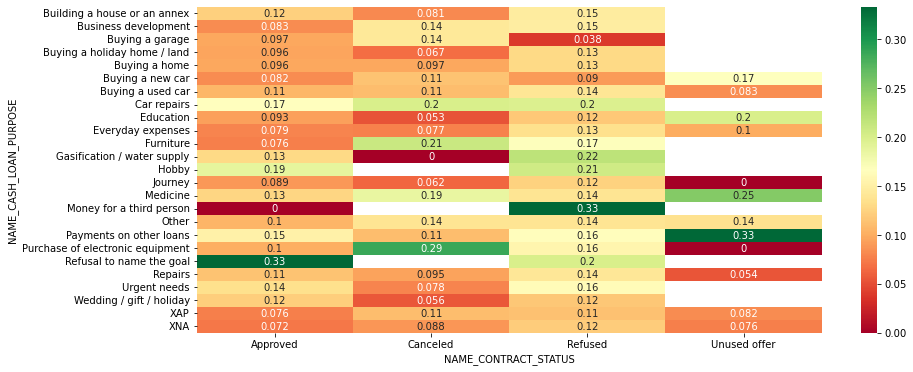

In [95]:
plt.figure(figsize=[14,6])
sns.heatmap(result,annot=True,cmap='RdYlGn')
plt.show()

### Observation : Contract is refused when the goal is not set/sometimes for Hobby/Water Supply/Gasification and it is approved for Holiday Home purchase/Home Purchase/car/Education

In [99]:
result = pd.pivot_table(data=newData,index="CODE_REJECT_REASON",columns="CODE_GENDER",values="TARGET")

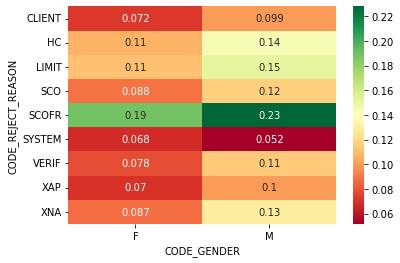

In [103]:
sns.heatmap(result,annot=True,cmap="RdYlGn")
plt.show()

### Observation : Loan are rejected based on SCOFR both for Male and Female

In [105]:
result = pd.pivot_table(data=newData,index="NAME_CASH_LOAN_PURPOSE",columns="CODE_GENDER",values="TARGET")

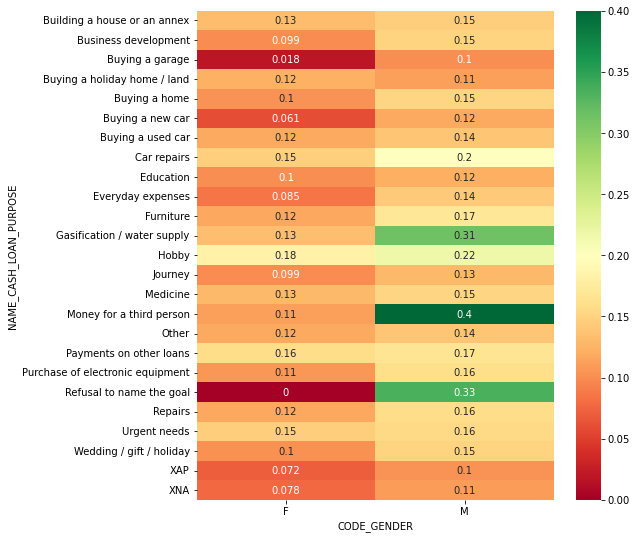

In [108]:
plt.figure(figsize=[8,9])
sns.heatmap(result,annot=True,cmap="RdYlGn")
plt.show()

### Observation : Male defaulter are more as compared to Female

In [ ]:
inp0.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(['mean','median',p75]).plot.bar()
plt.show()

# CONCLUSIONS:

Based on the analysis following are the features to identify the defaulters and non defaulters
    
    1) Non-Defaulters:
        a)NAME_EDUCATION_TYPE : Applicants with higher education and academic degree are less likely to be defaulters.
        b)CODE_GENDER : Males are more likely to be defaulters as compared to Females.
        c)AMT_INCOME_TOTAL : Applicants with higher salary are less defauting.
        d)OCCUPATION_TYPE : Accounts,Managers , Core Staff,Secretaries, High Skilled Tech Staff,IT/Medicine/Private Staff are non defaulter.
        e)NAME_FAMILY_STATUS : Married applicants are mostly non defaulters.
        f)ORGANIZATION_TYPE : Applicants in Industry 12 and Trade 4 are least defaulted among all
        g)DAYS_BIRTH : With increasing age chances of defaulting decreases
        
        ----------------------------------------------------------------------------
    2) Defaulters:
        a)CNT_CHILDREN: With higher count of children default rate goes up.
        b)NAME_EDUCATION_TYPE - Applicants with incomplete education, secondary education or lower secondary education are high default rates
        c)NAME_FAMILY_STATUS : Single/not married , Civil Marriage and Widow have high default rates
        d)OCCUPATION_TYPE : Labourers, Drivers, Waiters and other Low skilled Labourers are defaulting the most 
        e)DAYS_BIRTH: Below 30 applicants have highest rate of defaulting
        f)NAME_CASH_LOAN_PURPOSE : Applicants refusing to share the reason of loan or taking loan for Hobby are most defaulters
        g)ORGANIZATION_TYPE :Applicants in Transport Type 3, Industry Type 13 and 8 have more than 10% rate of defaulting.
        
        
        